<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Multilayer Perceptron (MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.13.1].
device:[cuda:0].


### Dataset

In [2]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


### Data Iterator

In [4]:
BATCH_SIZE = 256

# DataLoader를 통한 mini-batch 만들기
# shuffle은 반드시 True로!
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


### Define the MLP model

In [7]:
class MultiLayerPerceptronClass(nn.Module):
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass, self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.lin_1 = nn.Linear(
            self.xdim, self.hdim # input(x) to hidden(h)
        )
        self.lin_2 = nn.Linear(
            self.hdim, self.ydim # hidden(h) to output(y)
        )
        self.init_param() # initialize parameters
        
    def init_param(self): # PyTorch는 nn.Linear를 호출할 때 원래 알아서 initialization을 해줌
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self, x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net) # 마지막은 activation 필요 없음
        return net

M = MultiLayerPerceptronClass(name='mlp', xdim=784, hdim=256, ydim=10).to(device)
loss = nn.CrossEntropyLoss()
optm = optim.Adam(M.parameters(), lr=1e-3)
print ("Done.")

Done.


### Simple Forward Path of the MLP Model

* PyTorch의 가장 큰 장점이 session이 따로 없다는 것
    * 만들자마자 바로 run 할 수 있음

In [8]:
x_numpy = np.random.rand(2, 784)
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path
# y_torch = M(x_torch) # forward 메서드를 쓰지 않아도 알아서 forward로 작동하긴 함, 대신 forward는 매번 쓰는게 시인성이 좋음
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array -> to CPU
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.86661223 0.81949287 0.4608105  ... 0.37260303 0.38775499 0.02483326]
 [0.30389352 0.97794585 0.32441702 ... 0.80492465 0.47446038 0.35275762]]
x_torch:
 tensor([[0.8666, 0.8195, 0.4608,  ..., 0.3726, 0.3878, 0.0248],
        [0.3039, 0.9779, 0.3244,  ..., 0.8049, 0.4745, 0.3528]],
       device='cuda:0')
y_torch:
 tensor([[ 0.3631, -1.2710,  0.1676, -0.9820, -1.2923, -0.8454, -1.2626, -0.0113,
          0.5424, -0.1443],
        [ 0.6113, -0.9797, -0.7185, -0.6762, -0.7450, -0.2414, -0.5862, -0.4379,
          0.3952, -0.6383]], device='cuda:0', grad_fn=<AddmmBackward0>)
y_numpy:
 [[ 0.36312452 -1.2710363   0.16760397 -0.98202926 -1.2922969  -0.8454465
  -1.2626401  -0.01126605  0.5424388  -0.14427532]
 [ 0.61133724 -0.9797068  -0.71850777 -0.6762404  -0.7449808  -0.2414158
  -0.58624035 -0.43794626  0.39524418 -0.63826245]]


### Check Parameters

In [10]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))

# 보통 convolution 기반 신경망보다 그냥 dense layer로 구성된 신경망의 parameter가 훨씬 많음
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[ 0.033 -0.029 -0.079 -0.013  0.093]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[ 0.096 -0.142  0.146  0.003 -0.098]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### Evaluation Function

In [17]:
def func_eval(model, data_iter, device):
    with torch.no_grad():
        model.eval() # evaluate (affects DropOut and BN) -> training과 execution phase가 달라지는 경우가 있음
        n_total,n_correct = 0, 0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(
                # FILL IN HERE
                batch_in.view(-1, 28 * 28).to(device)
            )
            _, y_pred = torch.max(model_pred.data, 1)
            n_correct += (
                # FILL IN HERE
                y_pred == y_trgt
            ).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct / n_total)
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


### Initial Evaluation

In [16]:
M.init_param() # initialize parameters
train_accr = func_eval(M, train_iter, device)
test_accr = func_eval(M, test_iter, device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr, test_accr))

train_accr:[0.060] test_accr:[0.058].


### Train

In [18]:
print ("Start training.")
M.init_param() # initialize parameters, 원래는 random seed를 반드시 fix 해줘야함
M.train()
EPOCHS, print_every = 10, 1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    
    for batch_in, batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred, batch_out.to(device))
        # Update
        # FILL IN HERE
        optm.zero_grad()      # reset gradient
        loss_out.backward()   # backpropagate
        optm.step()           # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum / len(train_iter)
    
    # Print
    if (epoch % print_every == 0) or (epoch == EPOCHS-1):
        train_accr = func_eval(M, train_iter, device)
        test_accr = func_eval(M, test_iter, device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch, loss_val_avg, train_accr, test_accr))
print ("Done")        

Start training.
epoch:[0] loss:[0.385] train_accr:[0.944] test_accr:[0.942].
epoch:[1] loss:[0.166] train_accr:[0.964] test_accr:[0.960].
epoch:[2] loss:[0.117] train_accr:[0.975] test_accr:[0.968].
epoch:[3] loss:[0.089] train_accr:[0.976] test_accr:[0.970].
epoch:[4] loss:[0.070] train_accr:[0.984] test_accr:[0.974].
epoch:[5] loss:[0.056] train_accr:[0.988] test_accr:[0.975].
epoch:[6] loss:[0.047] train_accr:[0.990] test_accr:[0.978].
epoch:[7] loss:[0.040] train_accr:[0.992] test_accr:[0.978].
epoch:[8] loss:[0.033] train_accr:[0.994] test_accr:[0.979].
epoch:[9] loss:[0.027] train_accr:[0.995] test_accr:[0.977].
Done


### Test

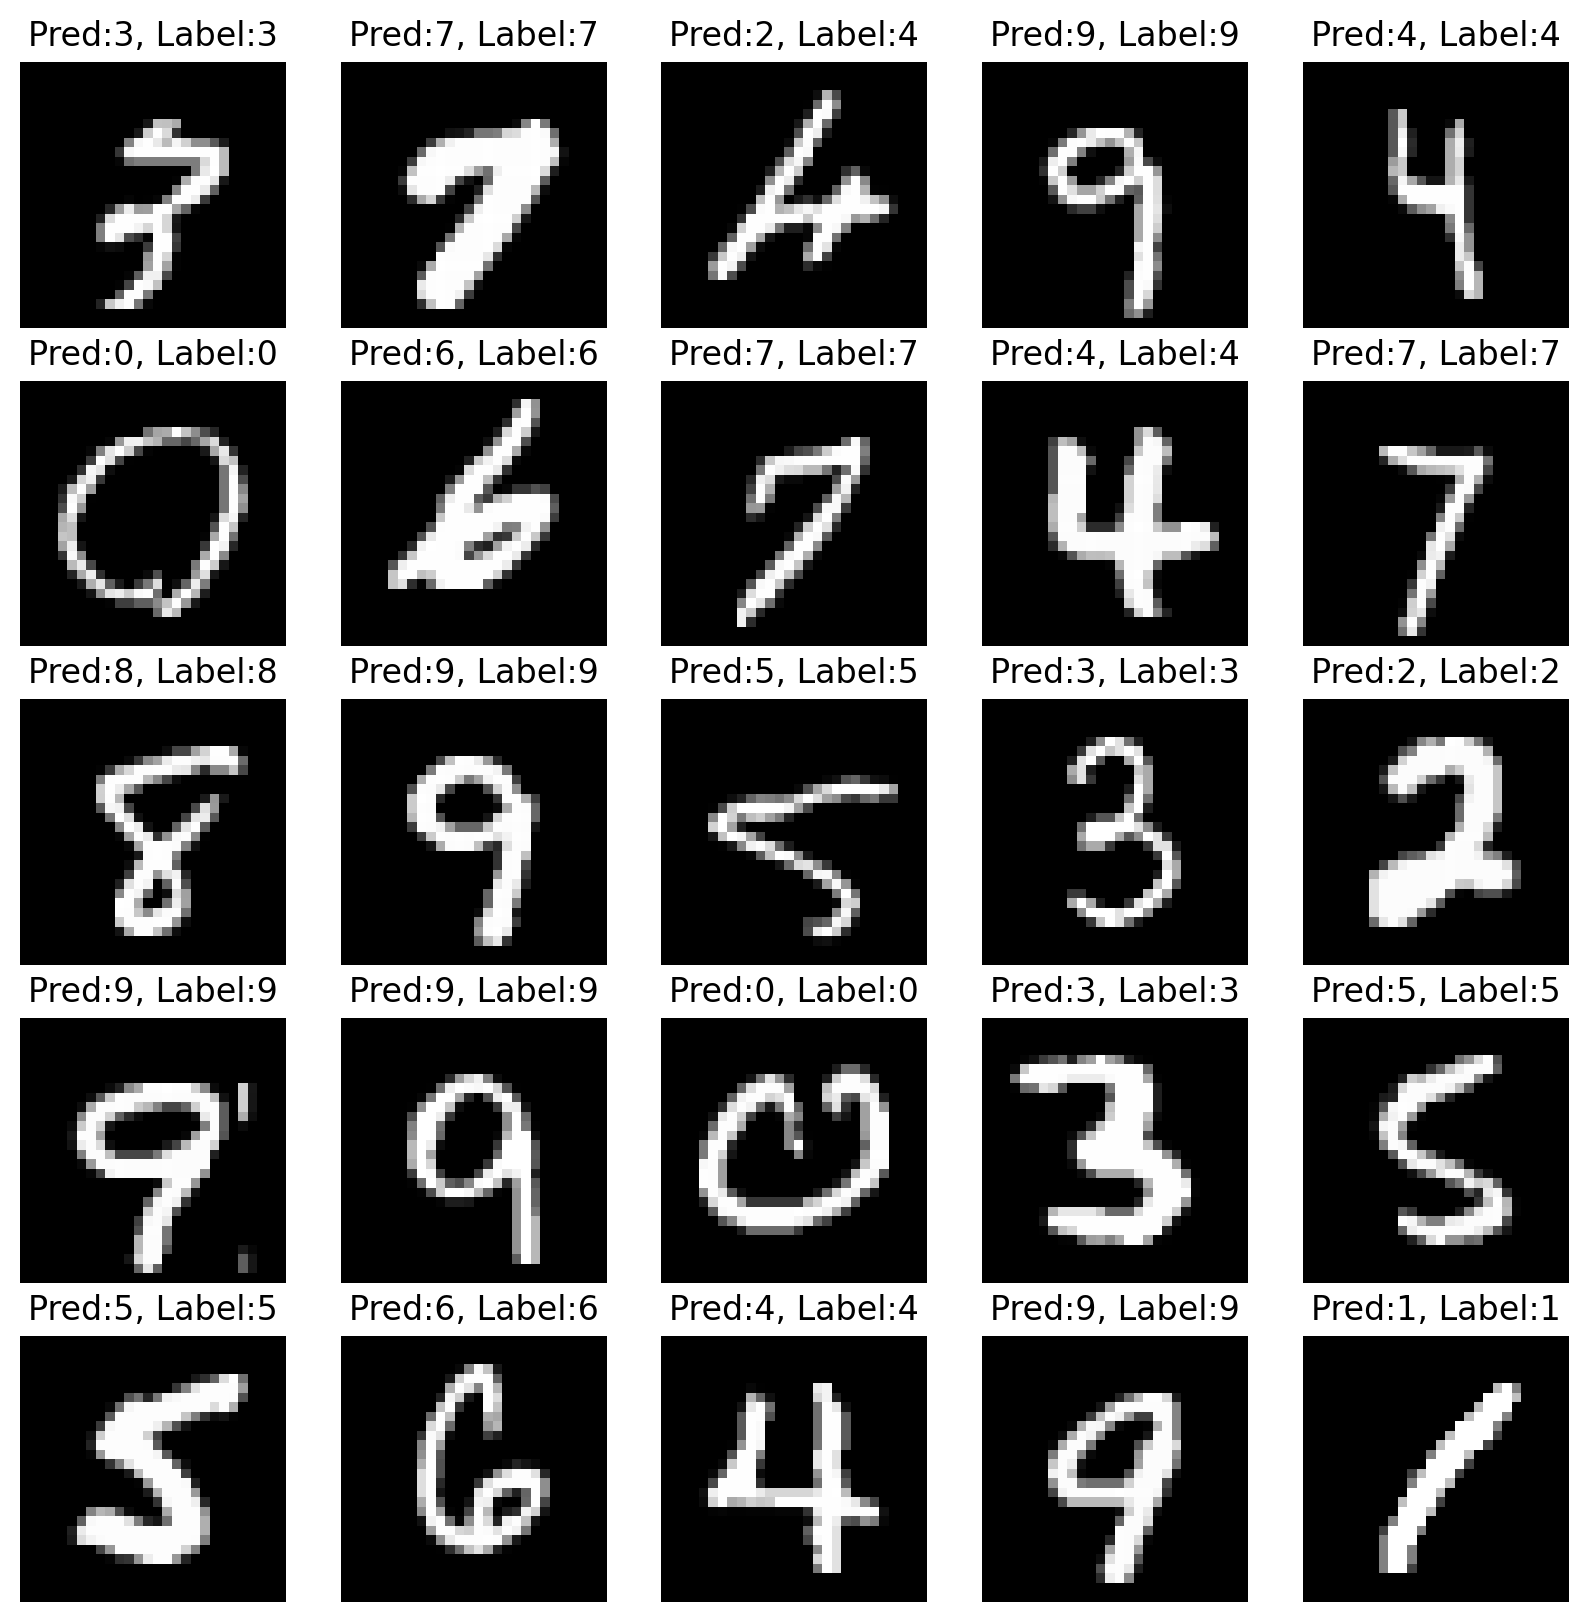

Done


In [19]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx], test_y[idx]))
plt.show()    
print ("Done")

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

